# Usikkerhetsanalyse av Biot-Savarts lov

## FY1003 Elektrisitet og magnetisme

### Laboratorieøvelse 3 Statisk magnetfelt

#### Norges Teknisk-Naturvitenskapelige Universitet

Av Håkon W. Ånes

Dato: 2018-02-15

___

**Mål:** Beregne $\Delta B(x)$ i hver posisjon $x$ for de fem geometriene kort spole, helmholtzspole ($a = (2R, R, R/2)$) og solenoide.

**Fremgangsmåte:**
1. Ser på usikkerhetsbidraget til $\Delta B$ fra hver av variablene som inngår i Biot-Savarts lov ved å benytte Gauss' feilforplantningslov.
2. Partiellderiverer hvert uttrykk ved bruk av Python-biblioteket `sympy`.

Noe av `sympy`s funksjoner benyttet i denne notebook-en finnes her [http://docs.sympy.org/latest/tutorial/calculus.html#](http://docs.sympy.org/latest/tutorial/calculus.html#). 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# Initialiserer pen visning av uttrykkene
sp.init_printing()

# Plotteparametre for å få store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

In [2]:
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
mu0, I, R, N, l, x, z = sp.symbols('mu0 I R N l x z')

# Kort spole

Lager uttrykk for Biot-Savarts lov for kort spole og skriver til skjerm.

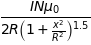

In [3]:
kort_spole = (N*I*mu0)/(2*R)*(1 + (x/R)**2)**(-3/2)
kort_spole

Da partiellderiverer vi med hensyn på f.eks. $x$, $I$ og $R$ og legger uttrykkene i en liste. For å sjekke om det faktisk er så lett som det ser ut skriver vi $\partial B/\partial I$ til skjerm.

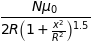

In [4]:
dBkd = [sp.diff(kort_spole, x), sp.diff(kort_spole, I), sp.diff(kort_spole, R)]
dBkd[1]

Suksess! Da skriver vi måleposisjoner og målte feltstyrker ved posisjonene vi ønsker å beregne usikkerhetene for til lister.

In [5]:
xk = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14,
      0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28,
      0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
      0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]

Bk = [0.22, 0.26, 0.3, 0.36, 0.42, 0.49, 0.58, 0.67, 0.79, 0.92, 1.09, 1.27, 1.51, 1.79,
      2.14, 2.57, 3.1, 3.75, 4.58, 5.62, 6.97, 8.59, 10.74, 13.3, 16.36, 19.85, 23.41, 26.57,
      27.76, 28.71, 29.2, 29.26, 28.91, 28.13, 26.97, 25.52, 22.19, 18.53, 15.21, 12.31,
      9.96, 8.04, 6.47, 5.26, 4.31, 3.51, 2.9, 2.41, 2.02, 1.7, 1.43, 1.21, 1.03, 0.87]

Spesifiserer så tenkte usikkerheter for variablene (ikke bruk disse, tenk ut dine egne!), beregner usikkerhetene med Gauss' feilforplantningslov

$$
\Delta B_\textrm{k} = \sqrt{\left(\frac{\partial B}{\partial x} \cdot \Delta x\right)^2
+ \left(\frac{\partial B}{\partial I} \cdot \Delta I\right)^2
+ \left(\frac{\partial B}{\partial R} \cdot \Delta R\right)^2}
$$

og plotter magnetfeltstyrken og usikkerhetene i samme plott.

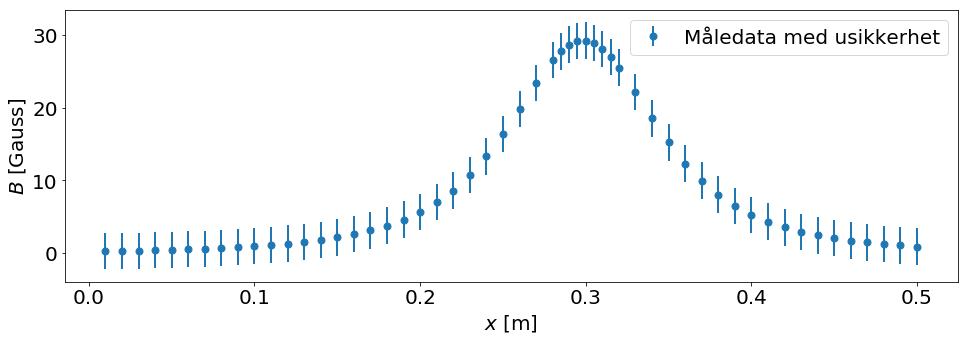

In [9]:
# Tenkte usikkerheter (ikke bruk disse, tenk gjennom eksperimentet og målemetodene og kom opp med
# deres egne!)
deltaxk = 0.01  # [m]
deltaIk = 0.03  # [A]
deltaRk = 0.0093 # [m]

# Legger dem i en liste i samme rekkefølge (! VIKTIG!) som dBkd
deltas = [deltaxk, deltaIk, deltaRk]

# Definerer et array av samme form som Bk
deltaBk = np.zeros(len(Bk))

# Beregner usikkerhetene for hver av måleposisjonene. Én iterasjon, én deltaB(x_i).
for i in range(len(xk)):
    
    # Benytter list comprehension her, se f.eks.
    # http://www.secnetix.de/olli/Python/list_comprehensions.hawk
    # Eksempel syntaks: variabel = [en-operasjon for i in range(3)]
    # Hva vi gjør (fra innerst til ytterst i linjen):
    #   1. Med dBkd[i].subs() bytter vi ut variablene N, I, mu0, R og x med tallverdier. x endrer seg
    #      fra iterasjon til iterasjon i løkken.
    #   2. Sørger for å gange hvert ledd med 10^4 for å gå fra Tesla til Gauss
    #   3. Kvadrerer
    #   4. Summerer de tre leddene ()^2
    deltaBk[i] = np.sum([(dBkd[i].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07),
                                        (x, xk[i])])*1e4*deltas[i])**2 for i in range(len(deltas))])
    # Så tar vi roten
    deltaBk[i] = np.sqrt(deltaBk[i])
    
# Plotter
plt.errorbar(xk, Bk, yerr=deltaBk, fmt='o', label='Måledata med usikkerhet')
plt.xlabel('$x$ [m]')
plt.ylabel('$B$ [Gauss]')
plt.legend();

# Helmholtzspoler og solenoide

... Dette kan dere gjøre selv. Hold tungen bent i munnen! Og husk, som alltid, Google først, *så* spør labass.